In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image 
from skimage.io import imread
import cv2
import os
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

n_classes = 20
batch_size = 32
img_width, img_height = 299, 299

train_data_dir = '/content/drive/MyDrive/Testing/dataset/train'

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_data_dir = '/content/drive/MyDrive/Testing/dataset/test'

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 911 images belonging to 20 classes.
Found 200 images belonging to 20 classes.


In [ ]:
class_map = train_generator.class_indices
class_map

{'biryani': 0,
 'burger': 1,
 'butterchicken': 2,
 'chapati': 3,
 'chicken': 4,
 'chickenrice': 5,
 'chilliparotta': 6,
 'cornflakes': 7,
 'crispychicken': 8,
 'curdrice': 9,
 'dosa': 10,
 'fishfry': 11,
 'frenchfries': 12,
 'gobi65': 13,
 'idli': 14,
 'kesari': 15,
 'kothuparotta': 16,
 'lemonrice': 17,
 'masaldosa': 18,
 'momos': 19}

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

nb_train_samples = 911 
nb_validation_samples = 200

inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=val_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=22,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
<ipython-input-21-3cb29a4b47bc>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/22
28/28 [==============================] - ETA: 0s - loss: 3.2442 - accuracy: 0.0557
Epoch 1: val_loss improved from inf to 3.16658, saving model to v1_inceptionV3


28/28 [==============================] - 71s 2s/step - loss: 3.2442 - accuracy: 0.0557 - val_loss: 3.1666 - val_accuracy: 0.0573
Epoch 2/22
28/28 [==============================] - ETA: 0s - loss: 3.1615 - accuracy: 0.0728
Epoch 2: val_loss improved from 3.16658 to 3.10037, saving model to v1_inceptionV3


28/28 [==============================] - 61s 2s/step - loss: 3.1615 - accuracy: 0.0728 - val_loss: 3.1004 - val_accuracy: 0.0990
Epoch 3/22
28/28 [==============================] - ETA: 0s - loss: 3.0543 - accuracy: 0.1206
Epoch 3: val_loss improved from 3.10037 to 3.03342, saving model to v1_inceptionV3


28/28 [==============================] - 61s 2s/step - loss: 3.0543 - accuracy: 0.1206 - val_loss: 3.0334 - val_accuracy: 0.1458
Epoch 4/22
28/28 [==============================] - ETA: 0s - loss: 3.0099 - accuracy: 0.1377
Epoch 4: val_loss improved from 3.03342 to 2.98378, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 3.0099 - accuracy: 0.1377 - val_loss: 2.9838 - val_accuracy: 0.1875
Epoch 5/22
28/28 [==============================] - ETA: 0s - loss: 2.9529 - accuracy: 0.1638
Epoch 5: val_loss improved from 2.98378 to 2.93386, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 2.9529 - accuracy: 0.1638 - val_loss: 2.9339 - val_accuracy: 0.2083
Epoch 6/22
28/28 [==============================] - ETA: 0s - loss: 2.8941 - accuracy: 0.1900
Epoch 6: val_loss improved from 2.93386 to 2.88856, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 2.8941 - accuracy: 0.1900 - val_loss: 2.8886 - val_accuracy: 0.2031
Epoch 7/22
28/28 [==============================] - ETA: 0s - loss: 2.8152 - accuracy: 0.2400
Epoch 7: val_loss improved from 2.88856 to 2.85637, saving model to v1_inceptionV3


28/28 [==============================] - 63s 2s/step - loss: 2.8152 - accuracy: 0.2400 - val_loss: 2.8564 - val_accuracy: 0.2344
Epoch 8/22
28/28 [==============================] - ETA: 0s - loss: 2.7493 - accuracy: 0.2867
Epoch 8: val_loss improved from 2.85637 to 2.80690, saving model to v1_inceptionV3


28/28 [==============================] - 64s 2s/step - loss: 2.7493 - accuracy: 0.2867 - val_loss: 2.8069 - val_accuracy: 0.2500
Epoch 9/22
28/28 [==============================] - ETA: 0s - loss: 2.6885 - accuracy: 0.3265
Epoch 9: val_loss improved from 2.80690 to 2.76254, saving model to v1_inceptionV3


28/28 [==============================] - 65s 2s/step - loss: 2.6885 - accuracy: 0.3265 - val_loss: 2.7625 - val_accuracy: 0.2760
Epoch 10/22
28/28 [==============================] - ETA: 0s - loss: 2.6203 - accuracy: 0.3379
Epoch 10: val_loss improved from 2.76254 to 2.71320, saving model to v1_inceptionV3


28/28 [==============================] - 63s 2s/step - loss: 2.6203 - accuracy: 0.3379 - val_loss: 2.7132 - val_accuracy: 0.3021
Epoch 11/22
28/28 [==============================] - ETA: 0s - loss: 2.5250 - accuracy: 0.4278
Epoch 11: val_loss improved from 2.71320 to 2.64879, saving model to v1_inceptionV3


28/28 [==============================] - 61s 2s/step - loss: 2.5250 - accuracy: 0.4278 - val_loss: 2.6488 - val_accuracy: 0.3698
Epoch 12/22
28/28 [==============================] - ETA: 0s - loss: 2.4808 - accuracy: 0.4187
Epoch 12: val_loss improved from 2.64879 to 2.58721, saving model to v1_inceptionV3


28/28 [==============================] - 61s 2s/step - loss: 2.4808 - accuracy: 0.4187 - val_loss: 2.5872 - val_accuracy: 0.4219
Epoch 13/22
28/28 [==============================] - ETA: 0s - loss: 2.3967 - accuracy: 0.4869
Epoch 13: val_loss improved from 2.58721 to 2.51616, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 2.3967 - accuracy: 0.4869 - val_loss: 2.5162 - val_accuracy: 0.4896
Epoch 14/22
28/28 [==============================] - ETA: 0s - loss: 2.2976 - accuracy: 0.5210
Epoch 14: val_loss improved from 2.51616 to 2.43882, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 2.2976 - accuracy: 0.5210 - val_loss: 2.4388 - val_accuracy: 0.5000
Epoch 15/22
28/28 [==============================] - ETA: 0s - loss: 2.2279 - accuracy: 0.5368
Epoch 15: val_loss improved from 2.43882 to 2.36904, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 2.2279 - accuracy: 0.5368 - val_loss: 2.3690 - val_accuracy: 0.5104
Epoch 16/22
28/28 [==============================] - ETA: 0s - loss: 2.1444 - accuracy: 0.5745
Epoch 16: val_loss improved from 2.36904 to 2.33500, saving model to v1_inceptionV3


28/28 [==============================] - 60s 2s/step - loss: 2.1444 - accuracy: 0.5745 - val_loss: 2.3350 - val_accuracy: 0.5052
Epoch 17/22
28/28 [==============================] - ETA: 0s - loss: 2.0650 - accuracy: 0.6325
Epoch 17: val_loss improved from 2.33500 to 2.22234, saving model to v1_inceptionV3


28/28 [==============================] - 64s 2s/step - loss: 2.0650 - accuracy: 0.6325 - val_loss: 2.2223 - val_accuracy: 0.5469
Epoch 18/22
28/28 [==============================] - ETA: 0s - loss: 1.9911 - accuracy: 0.6325
Epoch 18: val_loss improved from 2.22234 to 2.16871, saving model to v1_inceptionV3


28/28 [==============================] - 61s 2s/step - loss: 1.9911 - accuracy: 0.6325 - val_loss: 2.1687 - val_accuracy: 0.5469
Epoch 19/22
28/28 [==============================] - ETA: 0s - loss: 1.9038 - accuracy: 0.6678
Epoch 19: val_loss improved from 2.16871 to 2.09276, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 1.9038 - accuracy: 0.6678 - val_loss: 2.0928 - val_accuracy: 0.5469
Epoch 20/22
28/28 [==============================] - ETA: 0s - loss: 1.8148 - accuracy: 0.6883
Epoch 20: val_loss improved from 2.09276 to 2.01481, saving model to v1_inceptionV3


28/28 [==============================] - 66s 2s/step - loss: 1.8148 - accuracy: 0.6883 - val_loss: 2.0148 - val_accuracy: 0.5729
Epoch 21/22
28/28 [==============================] - ETA: 0s - loss: 1.7427 - accuracy: 0.7053
Epoch 21: val_loss improved from 2.01481 to 1.93980, saving model to v1_inceptionV3


28/28 [==============================] - 61s 2s/step - loss: 1.7427 - accuracy: 0.7053 - val_loss: 1.9398 - val_accuracy: 0.6146
Epoch 22/22
28/28 [==============================] - ETA: 0s - loss: 1.6756 - accuracy: 0.7088
Epoch 22: val_loss improved from 1.93980 to 1.90096, saving model to v1_inceptionV3


28/28 [==============================] - 62s 2s/step - loss: 1.6756 - accuracy: 0.7088 - val_loss: 1.9010 - val_accuracy: 0.6250


In [ ]:
model.save('/content/drive/MyDrive/modelfolder/model_v4.h5')

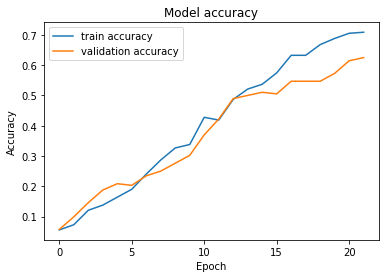

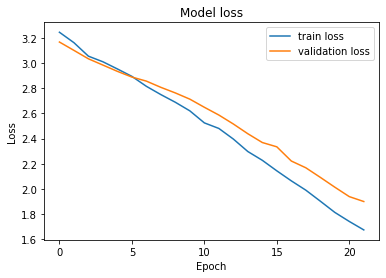

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

In [ ]:
category={
    0: ['briyani','Briyani'], 1: ['burger','Burger'], 2: ['butterchicken','Butter Chicken'],
    3: ['chapati','Chapati'], 4: ['chicken','Chicken'], 5: ['chickenrice','CHicken Rice'],
    6: ['chilliparotta','Chilli Parotta'], 7: ['cornflakes','CornFlakes'], 8: ['crispychicken','Crispy Chicken'], 9: ['curdrice','Curd Rice'],
    10: ['dosa','Dosa'], 11: ['fishfry','Fish Fry'], 12: ['frenchfries','French Fries'],
    13: ['gobi65','Gobi 65'], 14: ['idli','Idly'], 15: ['kessari','Kesari'],
    16: ['kothuparotta','Kothu Parotta'], 17: ['lemonrice','Lemon Rice'], 18: ['masaldosa','Masal Dosa'], 19: ['momos','Momos']
}

In [ ]:
path_to_model='/content/drive/MyDrive/modelfolder/model_v1.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [ ]:
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)

1/1 [==============================] - 2s 2s/step


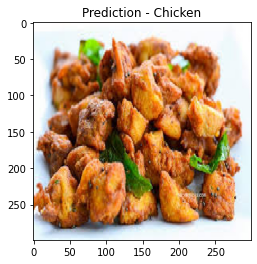

In [ ]:
predict_image('/content/Sample5.jpg',model)